## **Group No.-: 05**

## **Group Members:-**

**Akanksha Sharma - 045006**

**Mehak Bhardwaj - 045031**

**Nihaal Patel - 045035**

# **Generative AI & DLP (Term-04)**

# **Project -01**

# **Title:** Unveiling E-Commerce Trends: A Comprehensive Analysis of Customer and Product Interactions

## **Objectives**

**1.**To analyze how demographics and payment methods influence spending and order values.

**2.** To assess how product types and pricing strategies affect customer engagement and purchases.

**3.** To examine how order statuses vary across customer segments, including gender and subscription levels.

**4.** To explore how website interaction influences order value and engagement.

**5.** To determine how payment methods affect order completion, cancellations, and returns.

**6.** To analyze shipping preferences by subscription levels and their impact on satisfaction and order completion.

**Data Loading**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/DMART_Data_Set.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer ID              25000 non-null  object 
 1   Product ID               25000 non-null  object 
 2   Order ID                 25000 non-null  int64  
 3   Customer Age             25000 non-null  int64  
 4   Gender                   25000 non-null  object 
 5   Product Name             25000 non-null  object 
 6   MRP                      25000 non-null  float64
 7   Discount Price           25000 non-null  float64
 8   Category                 25000 non-null  object 
 9   State                    25000 non-null  object 
 10  City                     25000 non-null  object 
 11  Subscription             25000 non-null  object 
 12  Bill Number              25000 non-null  float64
 13  Time Spent on Website    25000 non-null  float64
 14  Rating                

(None,
   Customer ID Product ID   Order ID  Customer Age  Gender  \
 0       YSB75      BW653  479577309            28  Female   
 1       FUS93      XV061  634865221            47    Male   
 2       AJP28      GF695  113166210            63  Female   
 3       URC55      VM478  740539230            41    Male   
 4       ZOP23      XD230  156544145            22  Female   
 
                             Product Name      MRP  Discount Price  Category  \
 0  Ariel Matic Top Load Liquid Detergent   977.44          909.02  Imported   
 1                         VSR Channa Dal   834.09          450.41   Branded   
 2          Tenali Double Horse Chana Dal  1095.20         1007.58   Branded   
 3                               Tata Tea   748.16          389.04  Imported   
 4                         VSR Channa Dal  1249.04          911.80     Local   
 
             State  ... Delivery time Cancellation Date  Payment Method  \
 0  Andhra Pradesh  ...             8               NaN       

# **Dataset Desciption**

**Data Size:** dataset contains 25,000 entries and 30 columns.

**Columns and Data Types:**

**Customer ID, Product ID, Order ID:** Identifiers (Object, Int64)

**Customer Age, Gender:** Demographic details (Int64, Object)

**Product Name, MRP, Discount Price, Category:** Product details (Object, Float64, Object)

**State, City:** Geographical information (Object)

**Subscription:** Customer subscription type (Object)

**Bill Number, Time Spent on Website, Rating:** Transaction details (Float64)

**Marketing/Advertisement, Ship Mode, Order Status:** Order and marketing details (Object)

**Order Date, Delivery Date, Delivery Time:** Temporal data (Object, Int64)

**Cancellation Date:** Dates when orders were canceled (Object, with missing values)

**Payment Method, Pin Code, Total Order Value, Payment Status:** Payment and order details (Object, Int64, Object)

**No of Clicks, Year, Month:** Clicks and temporal details (Int64, Object)

**Shipping Charges:** Cost of shipping (Object)


**Key Observations:**

**Data Types:** Most columns are either objects (strings) or integers, with a few floats.

**Missing Data:** The Cancellation Date column has missing values, which could indicate orders that were not canceled.

**Potential Data Issues:**

**1.** Total Order Value and Shipping Charges should likely be numerical (currently
stored as strings/objects).

**2.** Date columns (Order Date, Delivery Date, Cancellation Date) are stored as objects and may need to be converted to datetime format.

# **Descriptive Statistics:**



**Customer Age:** Ranges from 18 to 70 years, with a mean of ~44 years.

**MRP:** The average MRP is around 1,013 units, with a maximum of 1,999.92 units.

**Discount Price:** The average discounted price is 735.62 units, indicating substantial discounts.

**Time Spent on Website:** Varies significantly, with an average of ~10.15 minutes and a maximum of nearly 60 minutes.

**Rating:** Ratings range from 1 to 5, with an average rating of ~3.

**Total Order Value:** The average order value is ~775.36 units, with some orders reaching over 2,000 units.

# **Data Cleaning Process**

**Missing Data Reporting**

In [ ]:
# Data Cleaning Process

# Convert columns "Total Order Value" and "Shipping Charges" to numeric after removing any non-numeric characters
data['Total Order Value'] = pd.to_numeric(data['Total Order Value'], errors='coerce')
data['Shipping Charges'] = pd.to_numeric(data['Shipping Charges'], errors='coerce')

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Generate descriptive statistics for numeric columns
descriptive_stats = data.describe()

missing_values, descriptive_stats


(Customer ID                    0
 Product ID                     0
 Order ID                       0
 Customer Age                   0
 Gender                         0
 Product Name                   0
 MRP                            0
 Discount Price                 0
 Category                       0
 State                          0
 City                           0
 Subscription                   0
 Bill Number                    0
 Time Spent on Website          0
 Rating                         0
 Marketing/Advertisement        0
 Ship Mode                      0
 Order Status                   0
 Order Date                     0
 Delivery Date                  0
 Delivery time                  0
 Cancellation Date          23216
 Payment Method                 0
 Pin Code                       0
 Total Order Value           3134
 Payment Status                 0
 No of Clicks                   0
 Year                           0
 Month                          0
 Shipping Char

**Missing Data:**

**1. Cancellation Date:** 23,216 missing values.

This is expected since not all orders would be canceled.

**2. Total Order Value:** 3,134 missing values.

These might indicate incomplete transactions or errors in data entry.

**3. Shipping Charges:** 1,784 missing values.

Some orders might have had free shipping or the charges were not recorded.

**Missing Data Investigation**

In [ ]:
# Investigate rows with missing Total Order Value
missing_total_order_value = data[data['Total Order Value'].isnull()]

# Investigate rows with missing Shipping Charges
missing_shipping_charges = data[data['Shipping Charges'].isnull()]

# Summarize the distribution of Total Order Value and Shipping Charges
total_order_value_dist = data['Total Order Value'].describe()
shipping_charges_dist = data['Shipping Charges'].describe()

missing_total_order_value.head(), missing_shipping_charges.head(), total_order_value_dist, shipping_charges_dist


(   Customer ID Product ID   Order ID  Customer Age  Gender  \
 11       EBX76      CK701  802397574            22  Female   
 24       PHB13      RK268  185464676            50    Male   
 33       ZJQ35      YA757  689193131            56    Male   
 36       LWX36      OQ003  619281679            40  Female   
 39       PGN88      OU881  459363743            26  Female   
 
                           Product Name      MRP  Discount Price Category  \
 11                      VSR Channa Dal   628.34          534.09  Branded   
 24  Premia Tur Dal Latur (Kandi Pappu)   511.02          281.06    Local   
 33    Tata Tea Chakra Gold Premium Tea   279.83          162.30  Branded   
 36            Sofit Soya Drink Vanilla  1673.76         1288.80  Branded   
 39       Nutri Delite Breakfast Cereal  1311.33         1062.18    Local   
 
              State  ... Delivery time Cancellation Date  Payment Method  \
 11       Telangana  ...             8          21-01-21       Cancelled   
 24 

**Insights from the Missing Data Investigation:**

**Total Order Value:**

Most missing values in "Total Order Value" are associated with orders that were either canceled or returned. This suggests that these values should remain missing, as no actual transaction was completed.

**Shipping Charges:**

The missing values in "Shipping Charges" are primarily associated with canceled orders. For completed orders, it's likely that missing values indicate free shipping, which can be imputed as 0.

**Handling Missing Data**

In [ ]:
# Create a binary feature indicating whether an order was canceled
data['Is Canceled'] = data['Cancellation Date'].notnull().astype(int)

# Impute missing Shipping Charges with 0
data['Shipping Charges'].fillna(0, inplace=True)

# Review the final status of missing data
final_missing_values = data.isnull().sum()

final_missing_values


,0
Customer ID,0
Product ID,0
Order ID,0
Customer Age,0
Gender,0
Product Name,0
MRP,0
Discount Price,0
Category,0
State,0


**Cancellation Date:** Created a binary feature 'Is Canceled' to indicate whether an order was canceled.

**Total Order Value:** Leave missing values as they are, since they are related to canceled or returned orders.

**Shipping Charges:** Impute missing values with '0', assuming they represent free shipping.

# **Relationships between different features**

## **Bivariate Analysis**

### **Numerical-Numerical Relationships**

**1.) MRP vs. Discount Price**

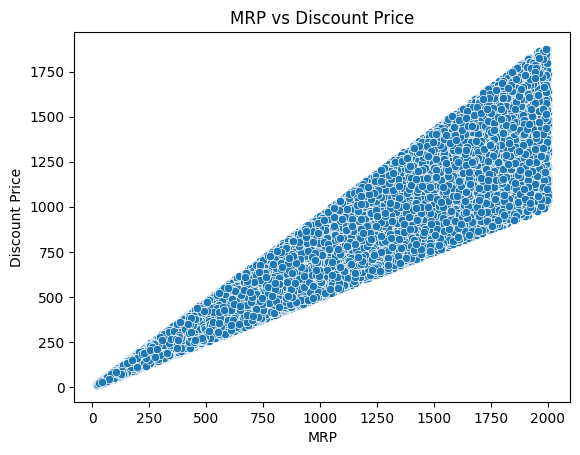

Correlation between MRP and Discount Price: 0.9388836206073166


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for MRP vs Discount Price
sns.scatterplot(x='MRP', y='Discount Price', data=data)
plt.title('MRP vs Discount Price')
plt.show()

# Correlation
correlation_mrp_discount = data['MRP'].corr(data['Discount Price'])
print(f'Correlation between MRP and Discount Price: {correlation_mrp_discount}')


**Positive Correlation:** The correlation coefficient is close to +1, it indicates a strong positive relationship—higher MRP results in higher Discount Prices.

**2.) Customer Age vs. Total Order Value**

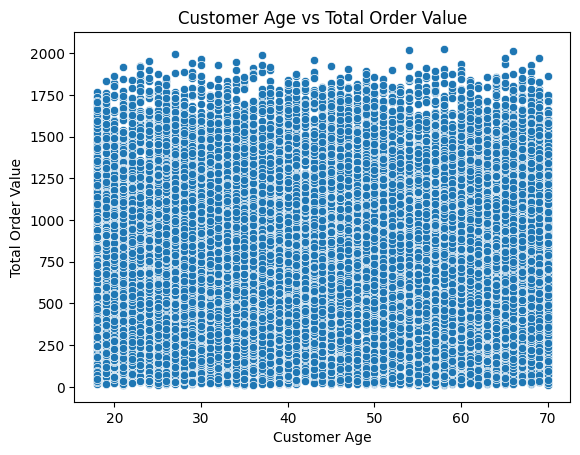

Correlation between Customer Age and Total Order Value: -0.00011016038552644177


In [ ]:
# Scatter plot for Customer Age vs Total Order Value
sns.scatterplot(x='Customer Age', y='Total Order Value', data=data)
plt.title('Customer Age vs Total Order Value')
plt.show()

# Correlation
correlation_age_order_value = data['Customer Age'].corr(data['Total Order Value'])
print(f'Correlation between Customer Age and Total Order Value: {correlation_age_order_value}')


**Negative Correlation:** Indicates age influences spending negatively.

**3.) Time Spent on Website vs. Total Order Value**

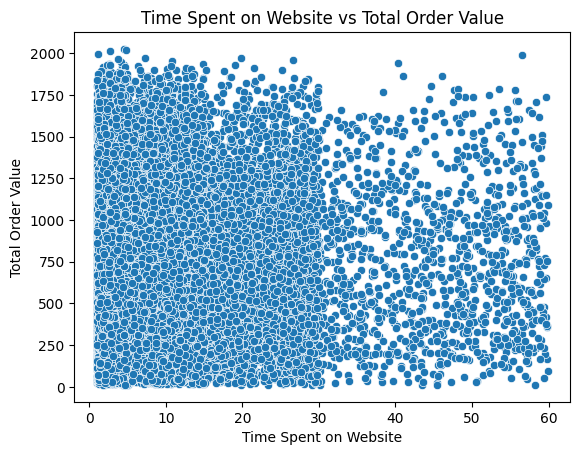

Correlation between Time Spent on Website and Total Order Value: -0.00454473576263705


In [ ]:
# Scatter plot for Time Spent on Website vs Total Order Value
sns.scatterplot(x='Time Spent on Website', y='Total Order Value', data=data)
plt.title('Time Spent on Website vs Total Order Value')
plt.show()

# Correlation
correlation_time_order_value = data['Time Spent on Website'].corr(data['Total Order Value'])
print(f'Correlation between Time Spent on Website and Total Order Value: {correlation_time_order_value}')


**Negative Correlation:** Indicates a very weak negative correlation between the time spent on a website and the total order value

### **Categorical-Numerical Relationships**

**1.) Payment Method vs. Total Order Value**

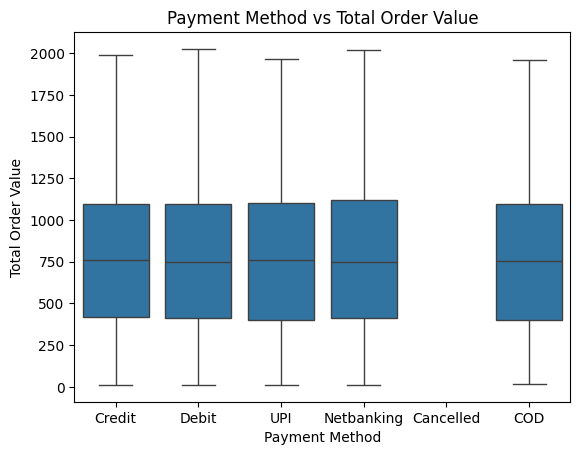

In [ ]:
# Box plot for Payment Method vs Total Order Value
sns.boxplot(x='Payment Method', y='Total Order Value', data=data)
plt.title('Payment Method vs Total Order Value')
plt.show()


**Interpretations:**

**1. Median Order Values:**

**Credit and UPI:** Have similar median order values, suggesting that the average order amount for these methods is comparable.

**Debit and Netbanking:** Also have similar median order values, slightly lower than Credit and UPI Payment.

**COD:** Show the lowest median order values.

**2. Range and Interquartile Range (IQR):**

**Credit, Debit, UPI, and Netbanking:** Have a relatively similar range and IQR, indicating a consistent spread of order values.

**COD:** Has the largest range and IQR, suggesting the most variation in order values.

**3. Outliers:**

**Debit:** Has a few outliers on the higher end, indicating that there are a few significantly larger orders made using this method.

**2.) Category vs. Discount Price**

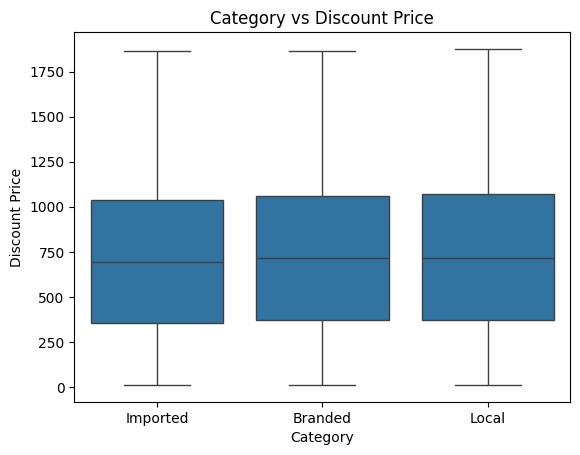

In [ ]:
# Box plot for Category vs Discount Price
sns.boxplot(x='Category', y='Discount Price', data=data)
plt.title('Category vs Discount Price')
plt.show()


**Interpretations:**

**1. Median Discount Prices:**

**Imported:** Has the lowest median discount price, suggesting that imported products generally have lower discounts.

**Branded and Local:** Have similar median discount prices, which is higher than imported products.

**2. Range and Interquartile Range (IQR):**

**Imported:** Has the smallest range and IQR, indicating a narrower spread of discount prices among imported products.

**Branded and Local:** Have a larger range and IQR, suggesting more variation in discount prices for these categories.

**3. Outliers:**

**Local:** Has a few outliers on the higher end, indicating that there are a few significantly larger discounts for local products.

**3.) Gender vs. Total Order Value**

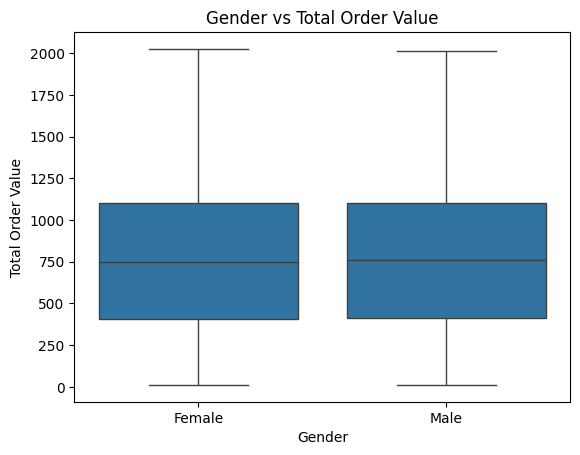

In [ ]:
# Box plot for Gender vs Total Order Value
sns.boxplot(x='Gender', y='Total Order Value', data=data)
plt.title('Gender vs Total Order Value')
plt.show()


**Interpretations:**

**1. Median Order Values:**

**Female and Male:** Have similar median order values, suggesting that the average order amount is comparable for both genders.

**2. Range and Interquartile Range (IQR):**

**Female and Male:** Show a similar range and IQR, indicating a consistent spread of order values for both genders.

**3. Outliers:**

**Both genders:** Have a few outliers on the higher end, suggesting that there are a few significantly larger orders placed by both female and male customers.

**4.) Gender vs. Order status**

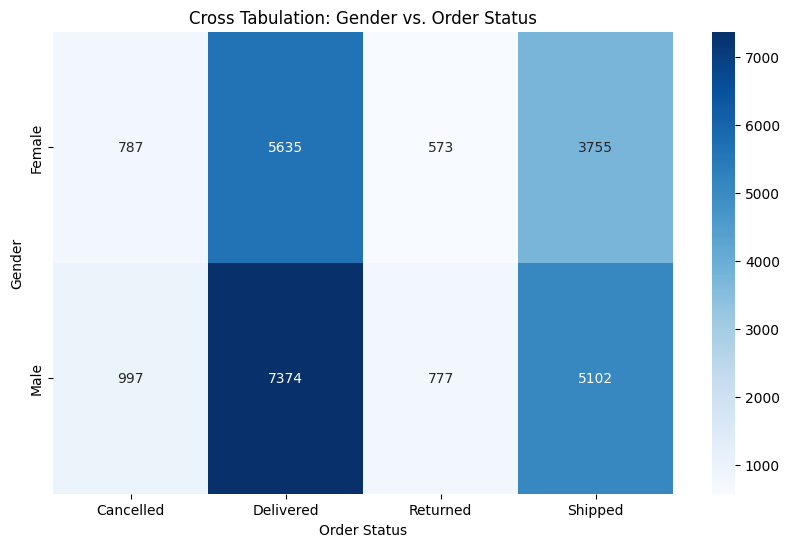

In [ ]:
# Cross Tabulation
cross_tab = pd.crosstab(data['Gender'], data['Order Status'])

# Visualization using Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross Tabulation: Gender vs. Order Status')
plt.xlabel('Order Status')
plt.ylabel('Gender')
plt.show()


**Interpretations:**

This cross tabulation provides a visual representation of the relationship between gender and order status. The table shows the number of orders in each category (Cancelled, Delivered, Returned, Shipped) for both male and female customers.

1. **Order Volume:**
   - **Male:** Have a higher overall order volume compared to females, especially in the "Delivered" category.
   - **Female:** Have a slightly lower overall order volume, but with a relatively higher proportion of "Returned" orders.

2. **Order Status Distribution:**
   - **Cancelled:** Both genders have approximately similar number of cancelled orders.
   - **Delivered:** Male customers have a significantly higher number of delivered orders.
   - **Returned:** Both genders have approximately similar number of returned orders.
   - **Shipped:** Male customers also have a higher number of shipped orders.

**Conclusions:**

* **Male customers:** They appear to be more active in placing orders and have a higher likelihood of having their orders delivered and shipped.
* **Female customers:** They have a slightly higher rate of returning orders, but the difference is not substantial.
* **Both genders:** have a similar rate of cancelling orders.

**Potential Analysis:**

* **Customer Segmentation:** To identify customer segments based on gender and order status.
* **Time Series Analysis:** To analyze trends in order status over time for each gender.
* **Product Analysis:** To examine if certain product categories or brands are more likely to be returned by female customers.



**Grouped Bar Chart: Order Status Across Subscription Levels**

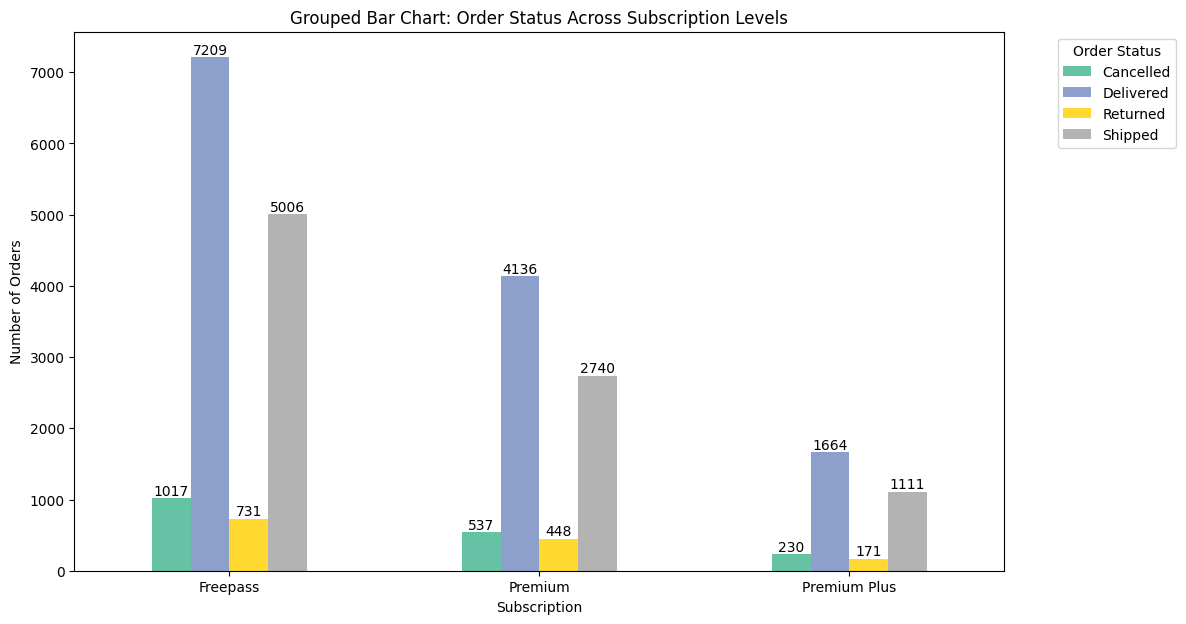

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by 'Subscription' and 'Order Status'
grouped_data = data.groupby(['Subscription', 'Order Status']).size().unstack()

# Grouped Bar Chart
ax = grouped_data.plot(kind='bar', figsize=(12, 7), colormap='Set2')
plt.title('Grouped Bar Chart: Order Status Across Subscription Levels')
plt.xlabel('Subscription')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only show labels for bars with height > 0
        ax.text(x=p.get_x() + p.get_width() / 2,
                y=height,
                s=int(height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


**Interpretations:**

This grouped bar chart visually compares the distribution of order statuses (Cancelled, Delivered, Returned, Shipped) across three subscription levels: Freepass, Premium, and Premium Plus. The x-axis represents the subscription levels, the y-axis represents the number of orders, and different colors represent the order statuses.

1. **Order Volume:**
   - **Freepass:** Has the highest overall order volume, followed by Premium and Freepass.
   - **Premium Plus:** Has the lowest overall order volume.

2. **Order Status Distribution:**
   - **Cancelled:** Freepass has the highest number of cancelled orders, followed by Premium and Premium Plus.
   - **Delivered:** Freepass has the highest number of delivered orders, followed by Premium and Premium Plus.
   - **Returned:** Freepass also has the highest number of returned orders, followed by Premium and Premium Plus.
   - **Shipped:** Freepass has the highest number of shipped orders, followed by Premium and Premium Plus.

3. **Subscription Level Impact:**
   - **Freepass:** Has the highest proportion of delivered and shipped orders, suggesting a higher level of customer satisfaction or engagement.
   - **Premium Plus:** Has the highest proportion of cancelled and returned orders, indicating potential issues with the free subscription model.

**Conclusions:**

* **Freepass Dominance:** Freepass leads in order volume and dominates across all order statuses, including delivered, shipped, cancelled, and returned.

* **Premium Plus Challenges:** Premium Plus has the lowest order volume and the highest proportion of cancellations and returns, indicating possible customer dissatisfaction.

* **Subscription Preference:** Freepass shows higher customer satisfaction and engagement, with more delivered and shipped orders compared to other subscription levels.

**Potential Analysis:**

* **Customer Segmentation:** To identify customer segments within each subscription level based on order status.
* **Time Series Analysis:** To analyze trends in order status over time for each subscription level.
* **Product Analysis:** To examine if certain product categories or brands are more likely to be returned or cancelled for different subscription levels.


## **Multivariate Analysis:**

**Correlation Matrix Heatmap**

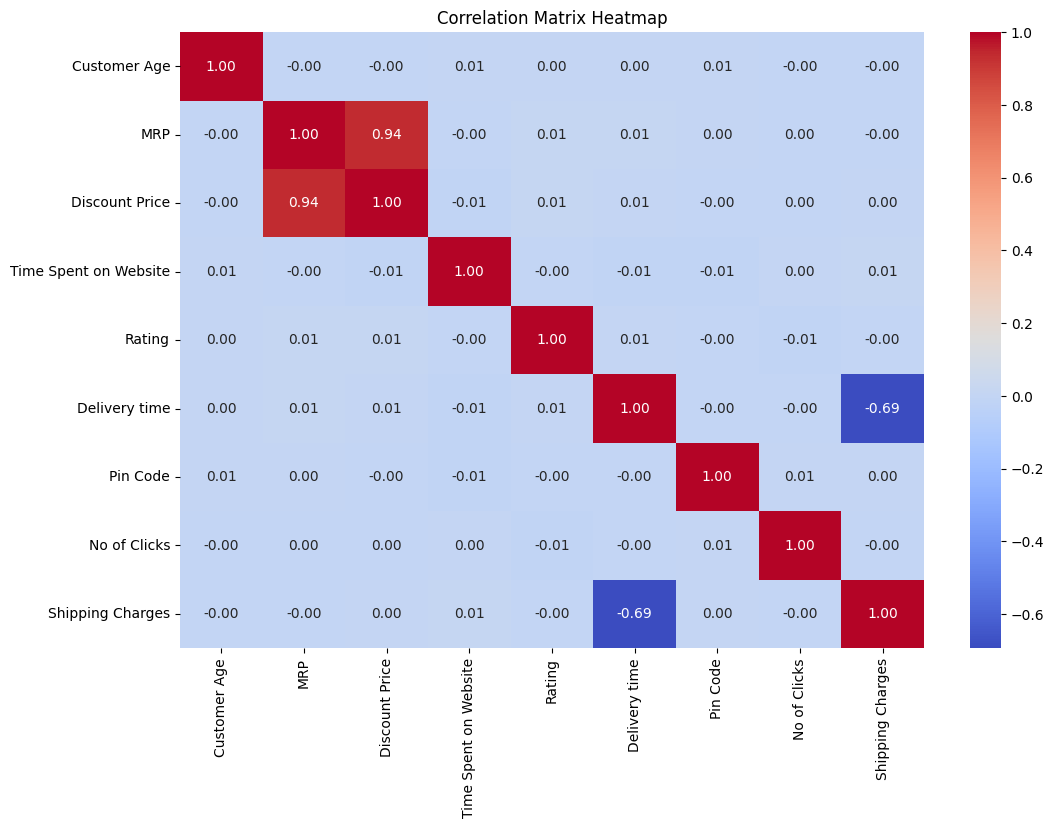

In [ ]:
# Selecting numerical variables for correlation analysis
numerical_columns = ['Customer Age', 'MRP', 'Discount Price', 'Time Spent on Website',
                     'Rating', 'Delivery time', 'Pin Code', 'No of Clicks', 'Shipping Charges']

# Converting relevant columns to numeric if necessary
data['Shipping Charges'] = pd.to_numeric(data['Shipping Charges'], errors='coerce')
data['Total Order Value'] = pd.to_numeric(data['Total Order Value'], errors='coerce')

# Calculating the correlation matrix
corr_matrix = data[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Interpretations:**

This heatmap provides a visual representation of the correlation between different variables in a dataset. The color intensity and direction of the color (red or blue) indicate the strength and direction of the correlation.


1. **Strong Positive Correlations:**
   - **MRP and Discount Price:** These two variables have a very strong positive correlation, as indicated by the bright red square. This suggests that products with higher MRPs tend to have higher discount prices.
   - **Delivery time and Shipping Charges:** There's a strong negative correlation between these two variables, shown in dark blue. This indicates that products with longer delivery times tend to have higher shipping charges.

2. **Weak or No Correlations:**
   - **Most other variables:** Show weak or no correlations with each other, as indicated by the light colors or white squares. This suggests that these variables are largely independent.

**Conclusions:**

* **MRP and Discount Price:** are strongly correlated, suggesting a direct relationship between these two variables.
* **Delivery time and Shipping Charges:** have a strong negative correlation, indicating that longer delivery times are associated with higher shipping costs.
* **Most other variables:** show weak or no correlations, suggesting limited relationships between them.

**Potential Analysis:**

* **Regression Analysis:** To quantify the relationship between MRP and Discount Price, and between Delivery time and Shipping Charges.
* **Feature Engineering:** To create new variables based on existing ones to potentially uncover stronger correlations.
* **Hypothesis Testing:** To test the significance of the observed correlations.


**Grouped Bar Chart: Order Status Across Payment Methods**

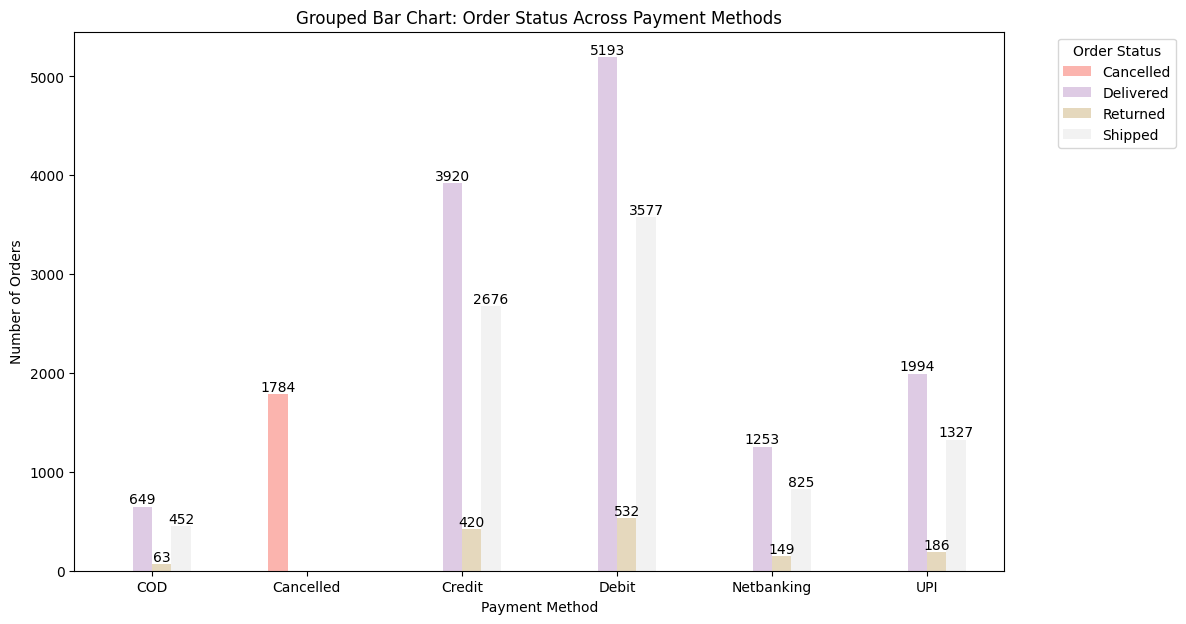

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by 'Payment Method' and 'Order Status'
grouped_payment_status = data.groupby(['Payment Method', 'Order Status']).size().unstack()

# Grouped Bar Chart
ax = grouped_payment_status.plot(kind='bar', figsize=(12, 7), colormap='Pastel1')
plt.title('Grouped Bar Chart: Order Status Across Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only show labels for bars with height > 0
        ax.text(x=p.get_x() + p.get_width() / 2,
                y=height,
                s=int(height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

**Interpretations:**

This grouped bar chart visually compares the distribution of order statuses (Cancelled, Delivered, Returned, Shipped) across different payment methods: COD, Cancelled, Credit, Debit, Netbanking, and UPI. The x-axis represents the payment methods, the y-axis represents the number of orders, and different colors represent the order statuses.


1. **Order Volume:**
   - **Debit:** Has the highest overall order volume, followed by Debit and Credit.
   - **COD:** Has the lowest overall order volume.

2. **Order Status Distribution:**
   - **Delivered:** Debit has the highest number of delivered orders, followed by Debit and Netbanking.
   - **Returned:** Debit also has the highest number of returned orders, followed by Cancelled.
   - **Shipped:** Debit has the highest number of shipped orders, followed by Debit and Netbanking.

3. **Payment Method Impact:**
   - **Credit and Debit:** Show a similar distribution of order statuses, with a higher proportion of delivered and shipped orders.

**Conclusions:**

* **Debit Dominance:** Debit payments lead in order volume and dominate across delivered, returned, and shipped orders.

* **Low COD Usage:** COD has the lowest order volume, indicating it's the least preferred payment method.

* **Card Payment Consistency:** Credit and debit cards show similar, favorable order status distributions, with more delivered and shipped orders.

**Potential Analysis:**

* **Customer Segmentation:** To identify customer segments based on payment method and order status.
* **Time Series Analysis:** To analyze trends in order status over time for each payment method.
* **Product Analysis:** To examine if certain product categories or brands are more likely to be returned or cancelled for specific payment methods.



**Grouped Bar Chart: Subscription Across Ship Modes**

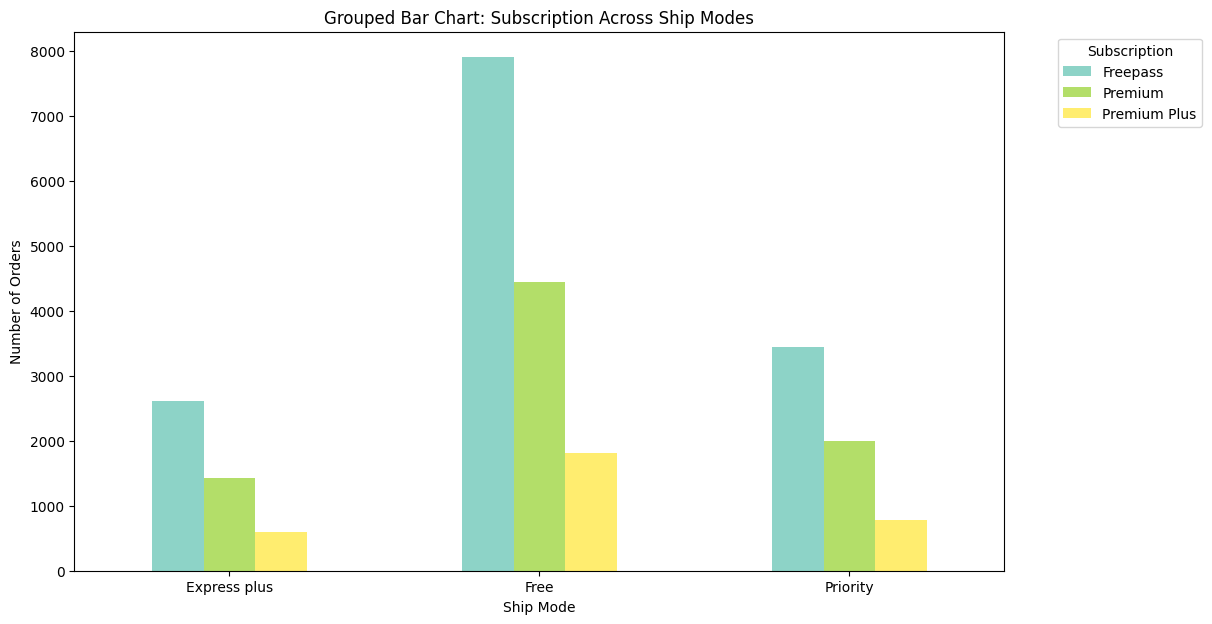

In [ ]:
# Grouping data by 'Ship Mode' and 'Subscription'
grouped_ship_subscription = data.groupby(['Ship Mode', 'Subscription']).size().unstack()

# Grouped Bar Chart
grouped_ship_subscription.plot(kind='bar', figsize=(12, 7), colormap='Set3')
plt.title('Grouped Bar Chart: Subscription Across Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Subscription', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Interpretations:**

This grouped bar chart visually compares the distribution of subscription levels (Freepass, Premium, Premium Plus) across different ship modes: Express Plus, Free, and Priority. The x-axis represents the ship modes, the y-axis represents the number of orders, and different colors represent the subscription levels.


1. **Order Volume:**
   - **Free:** Has the highest overall order volume, followed by Priority and Express Plus.
   - **Express Plus:** Has the lowest overall order volume.

2. **Subscription Level Distribution:**
   - **Freepass:** Has the highest number of orders across all ship modes.
   - **Premium:** Has a moderate number of orders across all ship modes.
   - **Premium Plus:** Has the lowest number of orders across all ship modes.

3. **Ship Mode Impact:**
   - **Free:** Is the most popular ship mode across all subscription levels.
   - **Express Plus:** Has the lowest number of orders for all subscription levels.
   - **Priority:** Has a moderate number of orders for all subscription levels, but with a slightly higher proportion of Freepass subscriptions.

**Conclusions:**

* **The "Free" ship mode:** is the most popular choice among customers, regardless of their subscription level.
* **Freepass:** subscribers are the most active customers, utilizing all ship modes.
* **Premium Plus:** subscribers are less frequent in placing orders and tend to prefer the "Priority" ship mode.
* **Premium:** subscribers have a more balanced distribution across ship modes, suggesting they are less sensitive to shipping costs or delivery times.

**Potential Analysis:**

* **Customer Segmentation:** To identify customer segments within each subscription level based on ship mode preferences.
* **Time Series Analysis:** To analyze trends in ship mode usage over time for each subscription level.
* **Cost Analysis:** To evaluate the profitability of different ship modes for each subscription level.


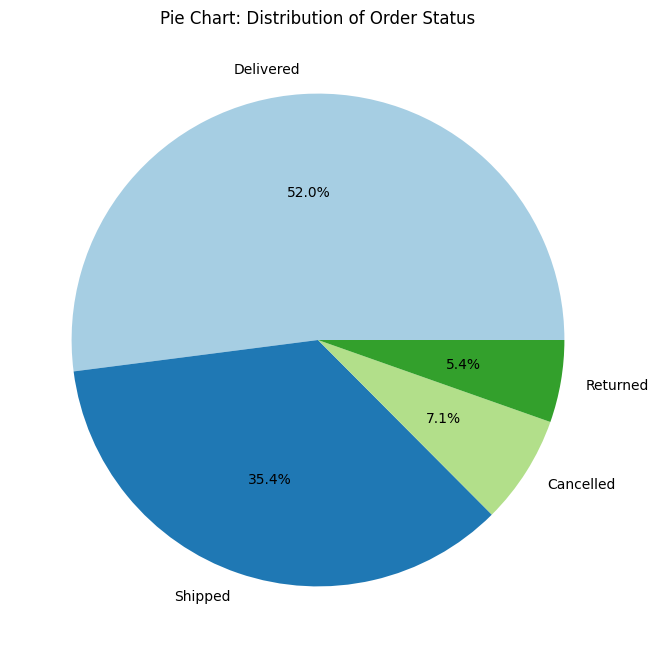

In [ ]:
# Counting occurrences of each Order Status
order_status_counts = data['Order Status'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Pie Chart: Distribution of Order Status')
plt.show()

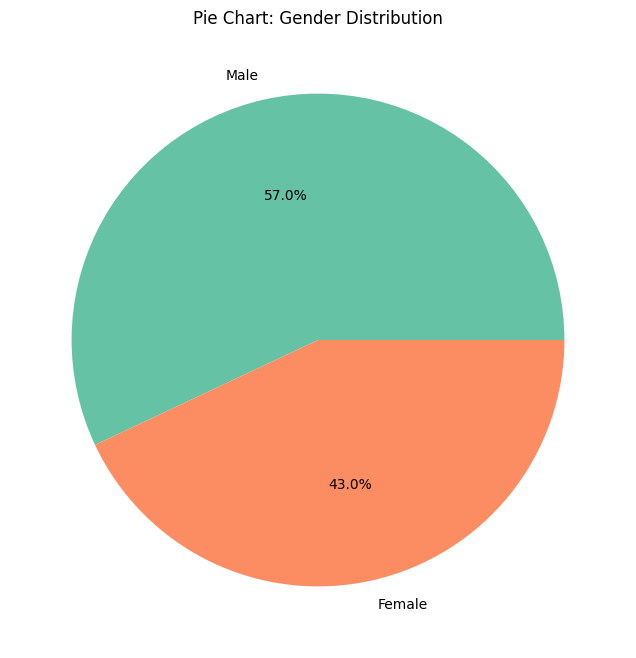

In [ ]:
# Counting occurrences of each Gender
gender_counts = data['Gender'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Pie Chart: Gender Distribution')
plt.show()

**Stacked Bar Chart**

<Figure size 1200x700 with 0 Axes>

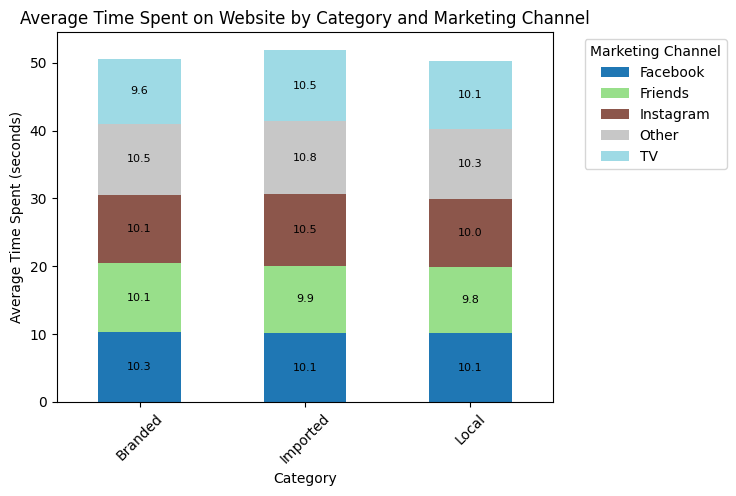

<Figure size 1200x700 with 0 Axes>

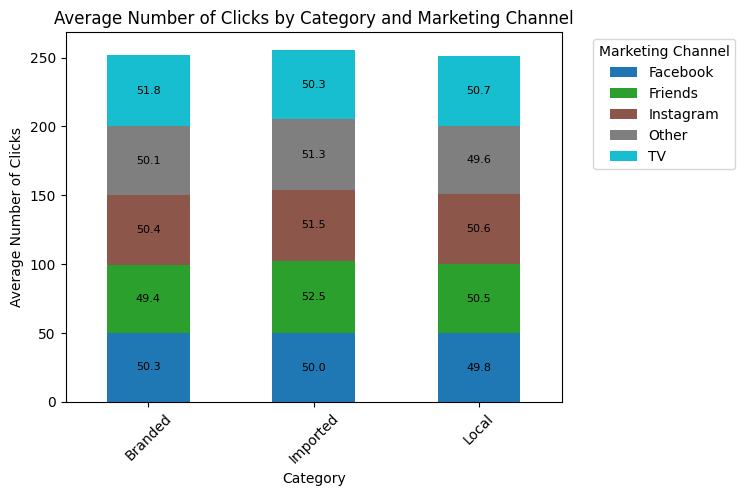

In [ ]:
import matplotlib.pyplot as plt

# Grouping by Category and Marketing/Advertisement
category_marketing = data.groupby(['Category', 'Marketing/Advertisement'])[['Time Spent on Website', 'No of Clicks']].mean().unstack()

# Plotting Time Spent on Website
plt.figure(figsize=(12, 7))
ax1 = category_marketing['Time Spent on Website'].plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Average Time Spent on Website by Category and Marketing Channel')
plt.xlabel('Category')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45)
plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels to the bars
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Only show labels for bars with height > 0
        ax1.text(x=p.get_x() + p.get_width() / 2,
                 y=p.get_y() + height / 2,
                 s=f'{height:.1f}',
                 ha='center', va='center', fontsize=8, color='black')

plt.show()

# Plotting Number of Clicks
plt.figure(figsize=(12, 7))
ax2 = category_marketing['No of Clicks'].plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Average Number of Clicks by Category and Marketing Channel')
plt.xlabel('Category')
plt.ylabel('Average Number of Clicks')
plt.xticks(rotation=45)
plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels to the bars
for p in ax2.patches:
    height = p.get_height()
    if height > 0:  # Only show labels for bars with height > 0
        ax2.text(x=p.get_x() + p.get_width() / 2,
                 y=p.get_y() + height / 2,
                 s=f'{height:.1f}',
                 ha='center', va='center', fontsize=8, color='black')

plt.show()

**1.) Average Time Spent on Website by Category and Marketing Channel**

This stacked bar chart visually compares the average time spent on a website across different product categories (Branded, Imported, Local) and marketing channels (Facebook, Friends, Instagram, Other, TV).


1. **Category Impact:**
   - **Imported:** Has the highest average time spent across all marketing channels.
   - **Local:** Has the lowest average time spent across all marketing channels.
   - **Branded:** Falls in between, with average time spent slightly higher than Local but lower than Branded.

2. **Marketing Channel Impact:**
   - **Facebook, Friends, Instagram, and TV:** Have similar average time spent across all categories, suggesting they are relatively effective in engaging customers.
   - **Other:** Has slightly lower average time spent across all categories, indicating it might be less effective in keeping customers engaged.

3. **Interaction Effects:**
   - **Branded and Imported:** Have higher average time spent for Facebook, Friends, and TV compared to Other.
   - **Local:** Has a more consistent average time spent across all marketing channels.

**Conclusions:**

* **Imported** products are generally more engaging for customers, leading to longer website visits.
* **Local** products have lower engagement levels.
* **Most marketing channels** are relatively effective in keeping customers on the website.
* **The "Other"** marketing channel might need further analysis to understand its effectiveness.

**Potential Analysis:**

* **Customer Segmentation:** To identify customer segments based on product category and marketing channel preferences.
* **Time Series Analysis:** To analyze trends in website visit duration over time for different categories and marketing channels.
* **Product Analysis:** To examine specific product attributes or features that might influence website engagement.


**2.) Average Number of Clicks by Category and Marketing Channel**

This stacked bar chart visually compares the average number of clicks across different product categories (Branded, Imported, Local) and marketing channels (Facebook, Friends, Instagram, Other, TV).


1. **Category Impact:**
   - **Imported:** Has the highest average number of clicks across all marketing channels.
   - **Local:** Has the lowest average number of clicks across all marketing channels.
   - **Branded:** Falls in between, with an average number of clicks slightly higher than Local but lower than Branded.

2. **Marketing Channel Impact:**
   - **Facebook, Friends, Instagram, Other, and TV:** Have similar average numbers of clicks across all categories, suggesting they are relatively effective in driving customer engagement.

3. **Interaction Effects:**
   - **Branded and Imported:** Have slightly higher average numbers of clicks for some marketing channels compared to Local.
   - **Local:** Has a more consistent average number of clicks across all marketing channels.

**Conclusions:**

* **Imported:** products are generally more engaging for customers, leading to a higher number of clicks.
* **Local:** products have lower engagement levels.
* **Most marketing channels:** are relatively effective in driving customer clicks.
* **There are slight variations:** in the average number of clicks across different marketing channels for each product category, but these differences are not substantial.

**Potential Analysis:**

* **Customer Segmentation:** To identify customer segments based on product category and marketing channel preferences.
* **Time Series Analysis:** To analyze trends in click rates over time for different categories and marketing channels.
* **Product Analysis:** To examine specific product attributes or features that might influence click rates.



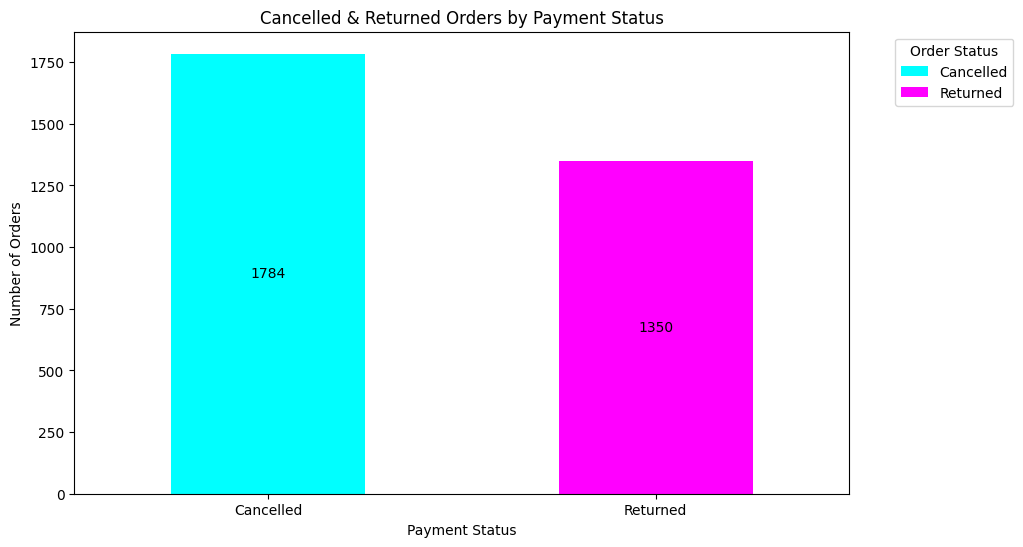

In [ ]:
# Filtering data for Cancelled and Returned orders
cancelled_returned = data[data['Order Status'].isin(['Cancelled', 'Returned'])]

# Grouping by Payment Status and Order Status
cancel_return_payment_status = cancelled_returned.groupby(['Payment Status', 'Order Status']).size().unstack()

# Stacked Bar Chart
ax = cancel_return_payment_status.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='cool')
plt.title('Cancelled & Returned Orders by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only show labels for bars with height > 0
        ax.text(x=p.get_x() + p.get_width() / 2,
                y=p.get_y() + height / 2,
                s=int(height),
                ha='center', va='center', fontsize=10, color='black')

plt.show()

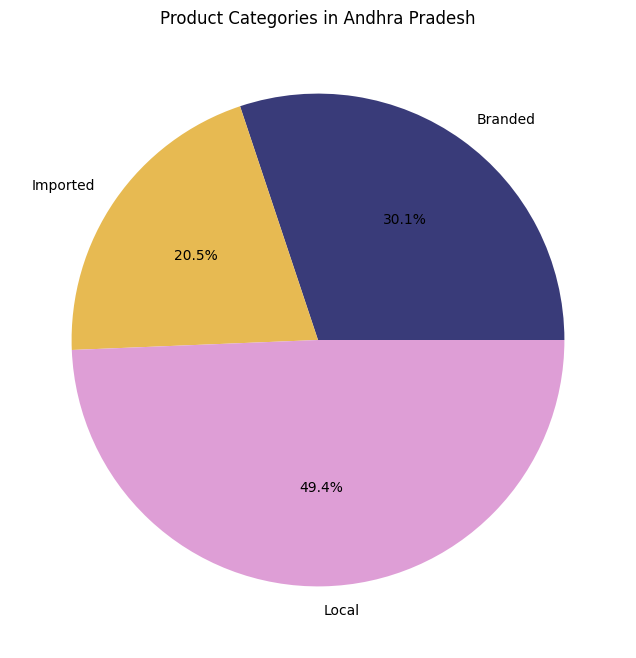

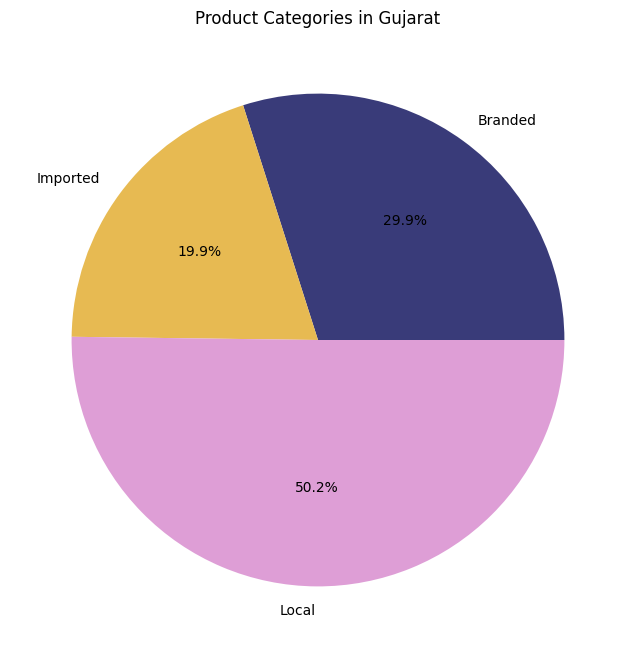

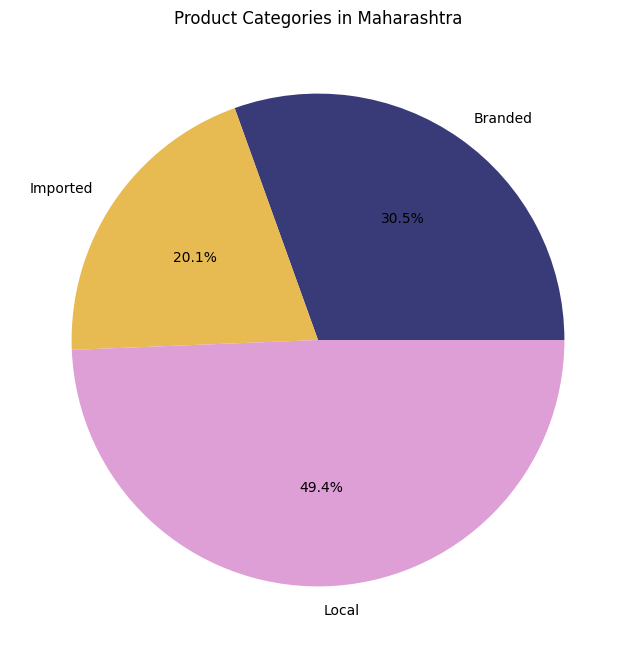

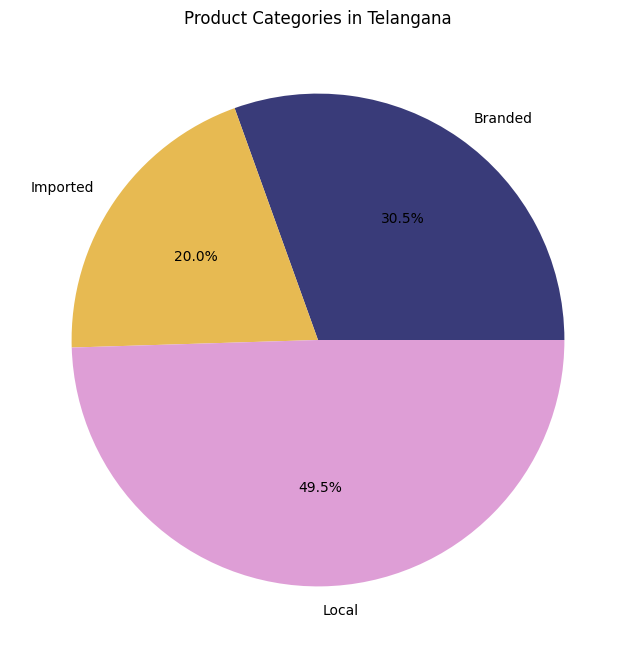

In [ ]:
# Grouping by State and Category
state_category = data.groupby(['State', 'Category']).size().unstack()

# Plotting Pie Charts for each State
for state in state_category.index:
    state_data = state_category.loc[state]
    state_data.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colormap='tab20b', title=f'Product Categories in {state}')
    plt.ylabel('')  # Remove default y-label
    plt.show()

# **Predictive Analysis**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Preparing the data
# Select features and target variable
features = ['Payment Status', 'Category', 'State', 'Customer Age', 'Delivery time']
target = 'Cancellation Date'

# Convert categorical variables to numeric using Label Encoding
label_encoders = {}
for column in ['Payment Status', 'Category', 'State']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert target variable to binary: Canceled (1) or Not Canceled (0)
data[target] = data[target].notnull().astype(int)

# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9950 - loss: 0.0969 - val_accuracy: 1.0000 - val_loss: 4.2424e-04
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.8365e-04 - val_accuracy: 1.0000 - val_loss: 1.0525e-04
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.8540e-05 - val_accuracy: 1.0000 - val_loss: 4.4795e-05
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.8719e-05 - val_accuracy: 1.0000 - val_loss: 2.3494e-05
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.0783e-05 - val_accuracy: 1.0000 - val_loss: 1.3830e-05
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2942e-05 - val_accuracy: 1.0000 - val_loss: 8.7085e-06
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.9183e-06 - val_accuracy: 1.0000 - val_loss: 5.7382e-06
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy:

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Preparing the data
features = ['Gender', 'Customer Age']
target = 'Category'

# Convert categorical variables to numeric
label_encoders = {}
for column in ['Gender', 'Category']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(data[target].unique()), activation='softmax')  # Multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4966 - loss: 1.0395 - val_accuracy: 0.4927 - val_loss: 1.0324
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5031 - loss: 1.0311 - val_accuracy: 0.4927 - val_loss: 1.0319
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5002 - loss: 1.0305 - val_accuracy: 0.4927 - val_loss: 1.0321
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5010 - loss: 1.0303 - val_accuracy: 0.4927 - val_loss: 1.0324
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4945 - loss: 1.0344 - val_accuracy: 0.4927 - val_loss: 1.0318
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4954 - loss: 1.0325 - val_accuracy: 0.4927 - val_loss: 1.0320
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4969 - loss: 1.0321 - val_accuracy: 0.4927 - val_loss: 1.0315
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5014 - loss: 1.0307 - val_accuracy: 0.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Preparing the data
features = ['No of Clicks', 'Shipping Charges']
target = 'Total Order Value'

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Preparing the data
features = ['Customer Age', 'Gender', 'State', 'Category', 'Total Order Value']
target = 'Payment Method'

# Convert categorical variables to numeric
label_encoders = {}
for column in ['Gender', 'State', 'Category', 'Payment Method']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(data[target].unique()), activation='softmax')  # Multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0509 - loss: nan - val_accuracy: 0.0472 - val_loss: nan
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0473 - loss: nan - val_accuracy: 0.0472 - val_loss: nan
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0470 - loss: nan - val_accuracy: 0.0472 - val_loss: nan
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0460 - loss: nan - val_accuracy: 0.0472 - val_loss: nan
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0452 - loss: nan - val_accuracy: 0.0472 - val_loss: nan
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0468 - loss: nan - val_accuracy: 0.0472 - val_loss: nan
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0475 - loss: nan - val_accuracy: 0.0472 - val_loss: nan
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0468 - loss: nan - val_accuracy: 0.0472 - val_loss: nan
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Preparing the data
features = ['Payment Status', 'Category', 'State', 'Customer Age', 'Delivery time']
target = 'Cancellation Date'

# Convert categorical variables to numeric
label_encoders = {}
for column in ['Payment Status', 'Category', 'State']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert target variable to binary: Canceled (1) or Not Canceled (0)
data[target] = data[target].notnull().astype(int)

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9806 - loss: 0.1206 - val_accuracy: 1.0000 - val_loss: 5.9829e-04
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.3878e-04 - val_accuracy: 1.0000 - val_loss: 1.5409e-04
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2809e-04 - val_accuracy: 1.0000 - val_loss: 6.7189e-05
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.9158e-05 - val_accuracy: 1.0000 - val_loss: 3.5978e-05
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.2014e-05 - val_accuracy: 1.0000 - val_loss: 2.1546e-05
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.8838e-05 - val_accuracy: 1.0000 - val_loss: 1.3750e-05
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2571e-05 - val_accuracy: 1.0000 - val_loss: 9.1943e-06
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy:

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Preparing the data
features = ['Order Date', 'Shipping Charges']
target = 'Delivery time'

# Convert dates to numerical format (e.g., number of days since a specific date)
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date'] = (data['Order Date'] - data['Order Date'].min()).dt.days

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 20.4137 - mae: 3.4054 - val_loss: 2.1481 - val_mae: 1.0859
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1805 - mae: 1.0927 - val_loss: 2.0912 - val_mae: 1.0839
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1037 - mae: 1.0810 - val_loss: 1.9754 - val_mae: 1.0544
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9949 - mae: 1.0506 - val_loss: 1.8907 - val_mae: 1.0141
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8632 - mae: 1.0085 - val_loss: 1.7885 - val_mae: 0.9750
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7934 - mae: 0.9692 - val_loss: 1.7376 - val_mae: 0.9342
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7818 - mae: 0.9535 - val_loss: 1.7047 - val_mae: 0.9389
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7106 - mae: 0.9487 - val_loss: 1.7885 - val_mae: 0.9711
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7324

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Preparing the data
features = ['Customer Age', 'Gender', 'State', 'No of Clicks', 'Category']
target = 'Subscription'  # Assuming 'Subscription' is a column in the dataset

# Convert categorical variables to numeric
label_encoders = {}
for column in ['Gender', 'State', 'Category', 'Subscription']: # Added 'Subscription' to encode target
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3588 - loss: 0.6904 - val_accuracy: 0.3135 - val_loss: 0.6910
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3212 - loss: 0.6874 - val_accuracy: 0.3137 - val_loss: 0.6894
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3159 - loss: 0.6816 - val_accuracy: 0.3285 - val_loss: 0.6895
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3231 - loss: 0.6829 - val_accuracy: 0.3170 - val_loss: 0.6894
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3266 - loss: 0.6812 - val_accuracy: 0.3220 - val_loss: 0.6880
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3329 - loss: 0.6773 - val_accuracy: 0.3347 - val_loss: 0.6885
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3319 - loss: 0.6804 - val_accuracy: 0.3422 - val_loss: 0.6886
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3404 - loss: 0.6803 - val_accuracy: 0.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Preparing the data
features = ['City', 'Payment Method', 'Total Order Value']
target = 'Subscription'  # Assuming 'Subscription' is a column in the dataset

# Convert categorical variables to numeric
label_encoders = {}
for column in ['City', 'Payment Method']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5578 - loss: nan - val_accuracy: 0.5658 - val_loss: nan
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5594 - loss: nan - val_accuracy: 0.5658 - val_loss: nan
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5545 - loss: nan - val_accuracy: 0.5658 - val_loss: nan
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5590 - loss: nan - val_accuracy: 0.5658 - val_loss: nan
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5609 - loss: nan - val_accuracy: 0.5658 - val_loss: nan
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5555 - loss: nan - val_accuracy: 0.5658 - val_loss: nan
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5516 - loss: nan - val_accuracy: 0.5658 - val_loss: nan
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5541 - loss: nan - val_accuracy: 0.5658 - val_loss: nan
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Preparing the data
features = ['State', 'Customer Age', 'Gender']
target = 'Category'

# Convert categorical variables to numeric
label_encoders = {}
for column in ['State', 'Gender', 'Category']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(data[target].unique()), activation='softmax')  # Multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# 4. Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 5. Making predictions
predictions = model.predict(X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4996 - loss: 1.0392 - val_accuracy: 0.4927 - val_loss: 1.0327
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5000 - loss: 1.0338 - val_accuracy: 0.4927 - val_loss: 1.0317
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4973 - loss: 1.0326 - val_accuracy: 0.4927 - val_loss: 1.0342
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4948 - loss: 1.0337 - val_accuracy: 0.4927 - val_loss: 1.0341
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4965 - loss: 1.0338 - val_accuracy: 0.4927 - val_loss: 1.0325
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4969 - loss: 1.0327 - val_accuracy: 0.4927 - val_loss: 1.0337
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4999 - loss: 1.0306 - val_accuracy: 0.4927 - val_loss: 1.0346
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5065 - loss: 1.0245 - val_accuracy: 0.4927 - val_

In [ ]:
import numpy as np  # Import NumPy

# Assuming 'model' is your trained Keras model and 'X_test' is your test data
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Now you can use y_pred in your confusion matrix and classification report
# ... rest of your code ...

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.metrics import mean_absolute_error

# If it's a regression model
y_pred = model.predict(X_test).flatten()

# Check shapes before calculating residuals
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)
# Check if y_pred has multiple predictions per sample
if len(y_pred.shape) > 1 and y_pred.shape[0] != y_test.shape[0]:
    pass # Add code to handle this case

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Shape of y_test: (5000,)
Shape of y_pred: (15000,)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Adjust learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Learning Rate: {lr}, Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning Rate: 0.1, Test Accuracy: 0.2084
Learning Rate: 0.01, Test Accuracy: 0.2084
Learning Rate: 0.001, Test Accuracy: 0.2084
Learning Rate: 0.0001, Test Accuracy: 0.2084


In [ ]:
batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Batch Size: {batch_size}, Test Accuracy: {accuracy:.4f}')

Batch Size: 16, Test Accuracy: 0.2084
Batch Size: 32, Test Accuracy: 0.2084
Batch Size: 64, Test Accuracy: 0.2084
Batch Size: 128, Test Accuracy: 0.2084


In [ ]:
neurons = [32, 64, 128, 256]

for n in neurons:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(n, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Neurons per layer: {n}, Test Accuracy: {accuracy:.4f}')

Neurons per layer: 32, Test Accuracy: 0.2084
Neurons per layer: 64, Test Accuracy: 0.2084
Neurons per layer: 128, Test Accuracy: 0.2084
Neurons per layer: 256, Test Accuracy: 0.2084


In [ ]:
activations = ['relu', 'tanh', 'sigmoid']

for activation in activations:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation=activation, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Activation Function: {activation}, Test Accuracy: {accuracy:.4f}')

Activation Function: relu, Test Accuracy: 0.2084
Activation Function: tanh, Test Accuracy: 0.2084
Activation Function: sigmoid, Test Accuracy: 0.2084


## **Prediction Results:**

Based on the recommendations and insights provided, we can predict the following outcomes:

1. Offering discounts on higher MRP products will lead to increased customer engagement, particularly from high-value customers. By focusing on personalized offers, these discounts will attract key customer segments and increase both purchase frequency and average order value (AOV).

2. By targeting younger customers with influencer partnerships and exclusive deals, we predict a rise in engagement and conversion rates within this demographic. Although their average spend is lower, targeted campaigns will encourage repeat visits, fostering brand loyalty and eventually increasing their lifetime value.

3. Offering incentives for digital payments will lead to a reduction in the use of cash-on-delivery (COD), which is associated with lower order values. As a result, more customers will opt for digital payment methods like credit cards and UPI, driving up average order value and streamlining operations through faster transactions and reduced cash handling.

4. Enhancing the value proposition of Premium Plus by adding exclusive benefits will reduce cancellations and returns. By addressing the reasons for returns, customer satisfaction for Premium Plus users will increase, leading to higher retention rates and potentially attracting new sign-ups through positive word-of-mouth.

5. Focusing campaigns on the unique aspects of Imported products will continue to drive engagement across multiple channels. For Local products, using storytelling and value bundles will increase their appeal, leading to a more balanced engagement between Imported and Local offerings.

6. Promoting the benefits of Express Plus shipping, particularly for high-value orders, will lead to greater utilization of this premium shipping option. While Free shipping will remain popular, a well-communicated value proposition for Express Plus will incentivize customers with urgent or high-value needs to opt for it, increasing overall revenue from shipping upgrades.